In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#need to test some of the movements here- model it after what Borna does, with the defined parameters that are then
#used to change the step size

# unit cell parameters in A- this is for the TiO2 (110) suraface. Will neet to change to multiples of the PES.
#not sure why this is included in the simulation. 
unitcell_a = 13.216
unitcell_b = 12.243
unitcell_c = 26.362

# primitive cell parameters in A (used for PES)
primcell_a = 4.84025 #these are the lengths of the a and b vectors- not the coordinates of then in cartesian
primcell_b = 4.84025 #would it be a good idea to add in the angle between the unit cells as well, and make that
                     #something used to walk around on the mesh?
N_mesh = 11*11
meshx = 0.1 #added from Borna's PES code
meshy = 0.1 #added from Borna's PES code
xstep_max  =  primcell_a / 10.0
ystep_max  =  primcell_b / 10.0

Xstep = primcell_a - primcell_b*np.cos(np.deg2rad(60))
Ystep = primcell_b*np.sin(np.deg2rad(60))
#okay, so what's basically happening above here is that it's defining the step_max to be a 10th of the primitive cell
#so what I think I need to do is for the PES_finder for the step, and any cases where a step is being taken,
#add a sin or cos as necessary to make sure that the step is going in the right way, not just being added/subtracted
#from the square lattice that we think of. I think I can just use what he used for tmp_x and tmp_y for generating
#the mesh in the first place. I should play around with geometry first though, to make sure it's clear in my head. 

# x and y boundaries of simulation
maxx   =  primcell_a * 2
minx   =  0.0 #this needs to be defined differently - I think if i define the vector rel to (0,0) then scale the
              #vector appropriately- probably just define it in the cdes
maxy   =  primcell_b * np.sqrt(3)/2 * 2
miny   =  0.0

In [4]:
def X_finder(y_coord,primcell,maxx): #this won't work for a supercell- have to play around with it! maybe do all rel maxx?
    #gives the minimum and maximum x values for a given y coordinate
    frac= y_coord /  (primcell * (np.sqrt(3)/2))
    min_x = frac * primcell * (-0.5)
    max_x = min_x + maxx
    return min_x, max_x

In [5]:
#from Borna's code generating the mesh
x=[]
y=[]
for i in np.arange(0,2.1,meshx):
        for j in np.arange(0,2.1,meshy):
            tmp_X = i*primcell_a - j*primcell_b*np.cos(np.deg2rad(60))
            tmp_Y = j*primcell_b*np.sin(np.deg2rad(60))
            x.append(tmp_X)
            y.append(tmp_Y)

In [5]:
X_find=X_finder(minx,primcell_a,maxx)

In [6]:
step_size=np.random.randint(-4,4)
step_size

-3

In [36]:
#final walking around, with the PBC working (for the primcell- need to think about expanding to a supercell)
#this is all steps of just a single mesh step - I should probably make sure that it works for larger jumps. 
start=np.random.randint(0,len(x))
traj=[[x[0],y[0]]]
direction_choice=[[1,0],[1/2,np.sqrt(3)/2],[-1/2,np.sqrt(3)/2],[-1/2,-np.sqrt(3)/2],[-1,0],[1/2,np.sqrt(3)/2]]
#step_size=np.random.randint(-3,3)
steps=[]
    

for i in range(1,300):
    step_size=np.random.randint(-3,3)
    step_direction=direction_choice[np.random.randint(0,len(direction_choice))]
    steps.append(step_direction)
    newx = traj[i-1][0] + (step_direction[0] * xstep_max * step_size)
    newy = traj[i-1][1] + (step_direction[1] * ystep_max * step_size)
    
    x_find=X_finder(newy,primcell_a,maxx)
    
    #PBC almost done
    # Y BOUNDARY
    if newy < miny:
        newy = maxy -miny + newy    
        newx = (newx-x_find[0]) + X_finder(newy,primcell_a,maxx)[0] 
    elif newy > maxy:    
        newy = miny - maxy + newy
        newx = (newx-x_find[0]) + X_finder(newy,primcell_a,maxx)[0] 
    
    # X BOUNDARY- need to account for the step size. 
    if newx < X_finder(newy,primcell_a,maxx)[0]:
        newx = X_finder(newy,primcell_a,maxx)[1] - X_finder(newy,primcell_a,maxx)[0] + (newx) #here I need to make sure the step size works. 
    elif newx > X_finder(newy,primcell_a,maxx)[1]:
        newx = X_finder(newy,primcell_a,maxx)[0] - X_finder(newy,primcell_a,maxx)[1] + newx
        
    traj.append([newx,newy])

In [37]:
trajx=[traj[i][0] for i in range(0,len(traj))]
trajy=[traj[i][1] for i in range(0,len(traj))]

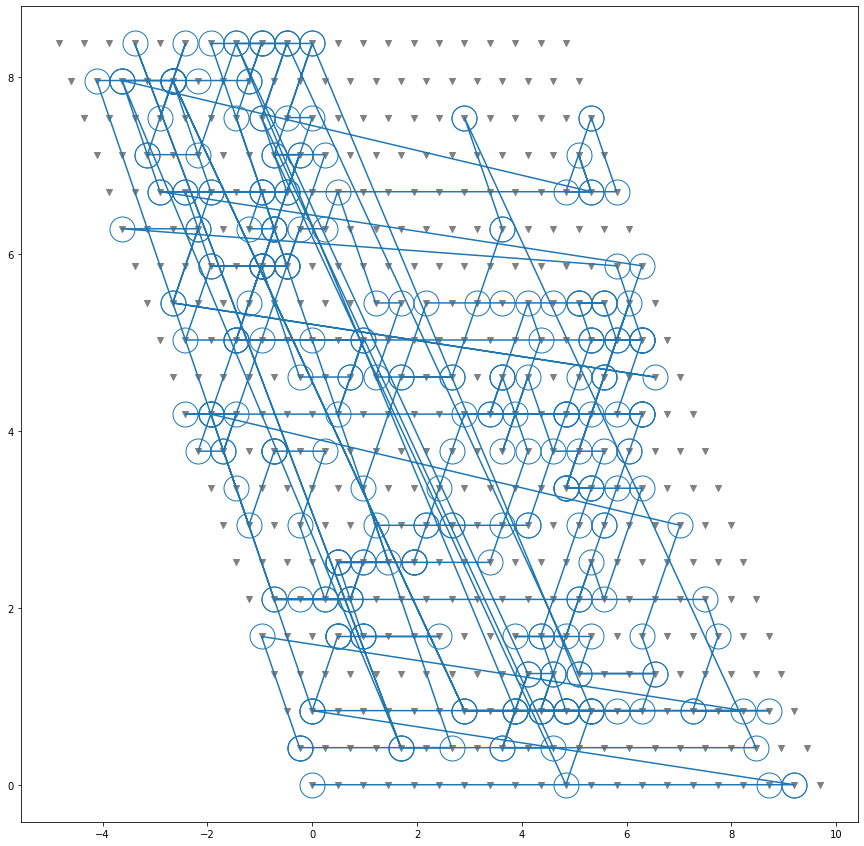

In [38]:
#plot to check the walking around on the grid
plt.figure(figsize=(15,15))
plt.scatter(x,y,marker="v",color="gray")
plt.plot(trajx,trajy,marker="o",markerfacecolor="none",ms=25)
plt.show()

In [ ]:
muckups=[]
index=[]
for i in range(0,len(trajx)):
    if trajx[i] not in x:
        muckups.append(trajx[i])
        index.append(i)

In [ ]:
index

In [ ]:
spot=np.random.randint(0,len(y))
y_choice=y[choice]
indices=[]
for i in range(0,len(y)):
    if y[i] == y_choice:
        indices.append(i)

        x_vals=[]

for i in indices:
    x_vals.append(x[i])
    
x_min=min(x_vals)
x_max=max(x_vals)

#so this allows the extraction of the min and max from the PES, but wouldn't work when working on a supercell-
#i need to make sure that I can extract the max/min value of x for any size supercell. 

In [ ]:
x_vals=[]

for i in indices:
    x_vals.append(x[i])
    
x_min=min(x_vals)
x_max=max(x_vals)

In [ ]:
def Y_finder(x,y,primcell):
    #gives the final coordinates for the min/maxy PBC movements
    newx = x * primcell * (-0.5)
    newy = y * maxy + (np.sqrt(3)/2)
    return newx,newy

In [ ]:
y_choice=y[5]
y_choice

In [ ]:
x_choice=x[5]

In [ ]:
test=Y_finder(x_choice,y_choice,maxx,maxy)

In [ ]:
test[1]

In [ ]:
#choose a random gridpoint
start=np.random.randint(0,len(x_1))
traj=[[x_1[start],y_1[start]]]
#here is the list of directions to choose from
direction_choice=[[1,0],[1/2,np.sqrt(3)/2],[-1/2,np.sqrt(3)/2],[-1/2,-np.sqrt(3)/2],[-1,0],[1/2,np.sqrt(3)/2]]
#now choose one of them
step_direction=direction_choice[np.random.randint(0,len(direction_choice))]
#then add x and y to initial choice of gridpoint
step2=[traj[0][0]+step_direction[0],traj[0][1]+step_direction[1]]
#looks like it's working- now try and get it into a for loop

In [ ]:
traj

In [ ]:
step_direction

In [ ]:
step2

In [ ]:
#generate my mesh where the steps are all unit length
x_1=[]
y_1=[]
for i in np.arange(0,11,1):
        for j in np.arange(0,11,1):
            tmp_X = i - j*np.cos(np.deg2rad(60))
            tmp_Y = j*np.sin(np.deg2rad(60))
            x_1.append(tmp_X)
            y_1.append(tmp_Y)

In [ ]:
plt.scatter(x_1,y_1)
plt.scatter(traj[0][0],traj[0][1],marker="v")
plt.scatter(step2[0],step2[1])
plt.show()